In [397]:
class avl_Node(object):
    def __init__(self, value, angle):
        self.value = value
        self.left = None
        self.right = None
        self.height = 1
        self.angle = angle
         
class AVLTree(object):
         
    def insert_node(self, root, value, angle):
        if not root:
            return avl_Node(value, angle)
        elif angle < root.angle:
            root.left = self.insert_node(root.left, value, angle)
        else:
            root.right = self.insert_node(root.right, value, angle)
 
        root.height = 1 + max(self.avl_Height(root.left),
                              self.avl_Height(root.right))
 
        # Update the balance factor and balance the tree
        balanceFactor = self.avl_BalanceFactor(root)
        if balanceFactor > 1:
            if angle < root.left.angle:
                return self.rightRotate(root)
            else:
                root.left = self.leftRotate(root.left)
                return self.rightRotate(root)
 
        if balanceFactor < -1:
            if angle > root.right.angle:
                return self.leftRotate(root)
            else:
                root.right = self.rightRotate(root.right)
                return self.leftRotate(root)
 
        return root
    def avl_Height(self, root):
        if not root:
            return 0
        return root.height
 
    # Get balance factore of the node
    def avl_BalanceFactor(self, root):
        if not root:
            return 0
        return self.avl_Height(root.left) - self.avl_Height(root.right)
    
    def preOrder(self, root):
        if not root:
            return
        print("{0} ".format((root.angle, root.value)), end=" ")
        self.preOrder(root.left)
        self.preOrder(root.right)
         
    def leftRotate(self, b):
        a = b.right
        T2 = a.left
        a.left = b
        b.right = T2
        b.height = 1 + max(self.avl_Height(b.left),
                           self.avl_Height(b.right))
        a.height = 1 + max(self.avl_Height(a.left),
                           self.avl_Height(a.right))
        return a
      
    def rightRotate(self, b):
        a = b.left
        T3 = a.right
        a.right = b
        b.left = T3
        b.height = 1 + max(self.avl_Height(b.left),
                           self.avl_Height(b.right))
        a.height = 1 + max(self.avl_Height(a.left),
                           self.avl_Height(a.right))
        return a
             
    def delete_node(self, root, value, angle):
 
        # Find the node to be deleted and remove it
        if not root:
            return root
        elif angle < root.angle:
            root.left = self.delete_node(root.left, value, angle)
        elif angle > root.angle:
            root.right = self.delete_node(root.right, value, angle)
        else:
            if root.left is None:
                temp = root.right
                root = None
                return temp
            elif root.right is None:
                temp = root.left
                root = None
                return temp
            temp = self.min_Value(root.right)
            root.value = temp[0]
            root.angle = temp[1]
            root.right = self.delete_node(root.right, temp[0], temp[1])
        if root is None:
            return root
 
        # Update the balance factor of nodes
        root.height = 1 + max(self.avl_Height(root.left), self.avl_Height(root.right))
        balanceFactor = self.avl_BalanceFactor(root)
 
        # Balance the tree
        if balanceFactor > 1:
            if self.avl_BalanceFactor(root.left) >= 0:
                return self.rightRotate(root)
            else:
                root.left = self.leftRotate(root.left)
                return self.rightRotate(root)
        if balanceFactor < -1:
            if self.avl_BalanceFactor(root.right) <= 0:
                return self.leftRotate(root)
            else:
                root.right = self.rightRotate(root.right)
                return self.leftRotate(root)
        return root
    
    def min_Value(self, avl_Node):
        current = avl_Node
        # loop down to find the leftmost leaf
        while(current.left is not None):
            current = current.left
        return (current.value, current.angle)
    
    def build_tree(self, root, inputSet, input_zero):
        for i in inputSet:
            root = self.insert_node(root, i, calc_polar_angle(input_zero, i))
        return root

In [398]:
from math import atan2

def bottom_most(points: list) -> tuple:
    """Function that fetches the bottom most point in the set of points given

    Args:
        points (list): a list of di-tuples representing x,y coordinates
    
    Returns:
        (tuple): the bottom most point in the set of points given
    """
    ref = points[0]
    for point in points:
        if point[1] < ref[1] or (point[1] == ref[1] and point[0] < ref[0]):
            ref = point   
    points.remove(ref)

    return ref

def calc_polar_angle(p1: tuple ,p2: tuple) -> float:
    """Function that gets the polar angle from two points by using arctan on the y-distance and x-distance
    
    Args:
        p1 (tuple) : a di-tuple (x,y) representing the first coordinate,
        p2 (tuple) : a di-tuple (x,y) representing the second coordinate.

    Returns:
        (float) : the polar angle between p1 and p2 in radians.
    """
    return atan2(p2[1] - p1[1], p2[0] - p1[0])

def determinant(p1: tuple, p2: tuple, p3: tuple) -> float:
    """Function that gets the determinant for p1, p2 and p3, to determine whether it is a clockwise or
       anticlockwise turn. 

        Args:
        p1 (tuple) : a di-tuple (x,y) representing the first coordinate,
        p2 (tuple) : a di-tuple (x,y) representing the second coordinate,
        p3 (tuple) : a di-tuple (x,y) representing the third coordinate,

    Returns:
        (float) : the determinant between p1, p2 and p3.

    Note:
        det > 0 -> clockwise turn
        det < 0 -> anticlockwise turn
        det == 0 -> points are collinear
    """

    return (p2[0]-p1[0]) * (p3[1]-p1[1])  - (p2[1]-p1[1]) * (p3[0]-p1[0])

In [399]:
import random

#code for random data generation
def generatePoint() -> tuple:
    """Function that generates a random valid point"""
    return (random.randint(0, 32767), random.randint(0, 32767))

def generatePoints(limit: int) -> list:
    """Function that generates a random list of point"""
    return [generatePoint() for point in range(limit)]

In [408]:
inputSet = generatePoints(100)
input_zero = bottom_most(inputSet)
Tree = AVLTree()       
root = None
root = Tree.build_tree(root, inputSet, input_zero)
stack = []
stack.append(input_zero)
for i in range(len(inputSet)):
    point = Tree.min_Value(root)
    root = Tree.delete_node(root, point[0], point[1])
    while len(stack) > 1 and determinant(stack[-2], stack[-1],point[0]) < 0:
        #removes points on the stack that make an anticlockwise turn
        del stack[-1]
    stack.append(point[0]) #adds points that could potentially be on the convex hull.
stack.append(stack[0])

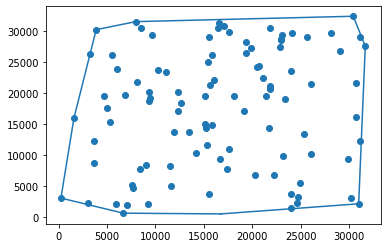

In [409]:
import matplotlib.pyplot as plt
plt.figure()
#first do a scatter plot of the inputSet
input_xs, input_ys = zip(*inputSet)
plt.scatter(input_xs, input_ys)
output_xs, output_ys = zip(*stack)
plt.plot(output_xs, output_ys) 

#then do a polygon plot of the computed covex hull
plt.show()